In [1]:
# importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import time
import cv2

import warnings
warnings.filterwarnings('ignore')

**Q.1 write python code  from scratch to convert color image (Rose.jpg)  to grayscale image using  a 
def function and list of comprehension method and plot processing time comparison with other methods**

In [2]:
def rgb2gray(img1):
    
    # This function will convert the color image to grayscale
    # input: 
    #    img1: Color image as numpy ndarray 
    
    row, col, ch = img1.shape
    
    # method 1
    # use for loops to calcuate the grayscale value pixel by pixel
    img_gray1 = np.zeros([row, col])
    time1 = time.time()
    for i in range(row):
        for j in range(col):
            img_gray1[i][j] = 0.11*img1[i][j][0] + 0.59*img1[i][j][0] + 0.30*img1[i][j][2]
    time1 = time.time() - time1
    
    # method 2
    # used np.mean() function to get the average of RGB values
    time2 = time.time()
    img_gray2 = np.mean(img1, axis=2)
    time2 = time.time() - time2
    
    # method 3 
    # In built opencv function to get the grayscale image
    time3 = time.time()
    img_gray3 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    time3 = time.time() - time3
    
    # method 4 
    # list comprehension to get the grayscale 
    time4 = time.time()
    img_copy = np.reshape(img1, [row*col, ch])

    img_gray4 = np.zeros([row*col, ch])
    img_gray4[:,0] = 0.3*img_copy[:,0]
    img_gray4[:,1] = 0.59*img_copy[:,1]
    img_gray4[:,2] = 0.11*img_copy[:,2]

    img_g4 = [i[0] + i[1]+ i[2] for i in img_gray4]
    img_g4 = np.reshape((img_g4), [row, col])
    print(img_g4.shape)
    time4 = time.time() - time4
    
    print('time taken by each method :', time1,'sec. ,', time2,'sec. ,', time3, 'sec. , ' ,time4, 'sec. ')
    plot_time([time1, time2, time3, time4])
    
    # visualizing the two images side by side
    fig, ax = plt.subplots(1, 4, figsize =(20,  12))
    ax[0].imshow(img_gray1, cmap = plt.get_cmap('gray'))
    ax[0].set_title('Method 1: for loops')
    ax[1].imshow(img_gray2, cmap = plt.get_cmap('gray'))
    ax[1].set_title('Method 2: np.mean')
    ax[2].imshow(img_gray3, cmap = plt.get_cmap('gray'))
    ax[2].set_title('Method 3: cv2.cvtColor')
    ax[3].imshow(img_g4, cmap = plt.get_cmap('gray'))
    ax[3].set_title('Method 4: List comprehension')
    
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')

    plt.tight_layout()
    
    return img_g4


def plot_time(data):
    
    X = np.arange(len(data))
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(X + 0.00, data, color = 'b', width = 0.25)

    ax.set_ylabel('Time (in sec.)')
    ax.set_title('Time consumption')
    ax.set_xticklabels([' ', 'Method 1',' ',  'Method 2',' ', 'Method 3',' ', 'Method 4'])
    ax.set_xlabel('Method')

(360, 480)
time taken by each method : 6.723683834075928 sec. , 0.01010894775390625 sec. , 0.0 sec. ,  0.4257090091705322 sec. 


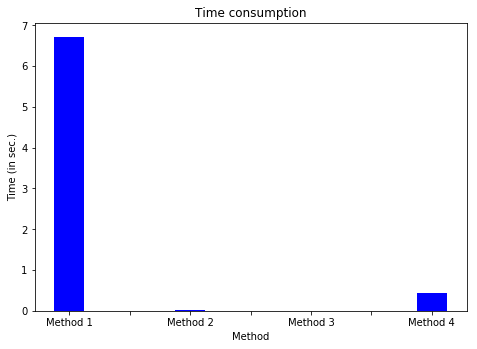

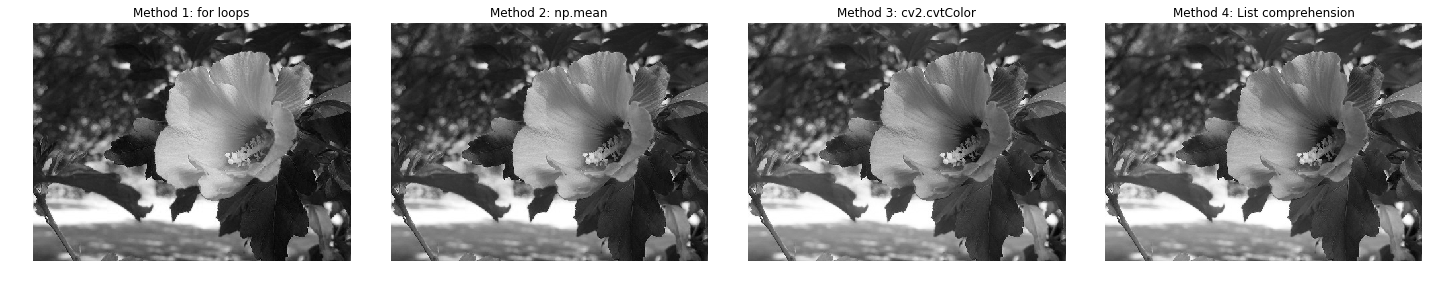

In [5]:
imgRose = image.imread('Rose.jpg')
img_grayRose = rgb2gray(imgRose)

(512, 512)
time taken by each method : 11.259411096572876 sec. , 0.02878737449645996 sec. , 0.0 sec. ,  0.5588979721069336 sec. 


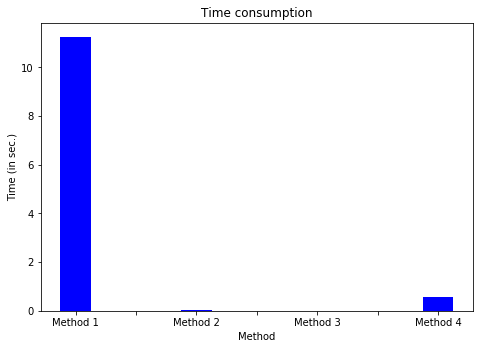

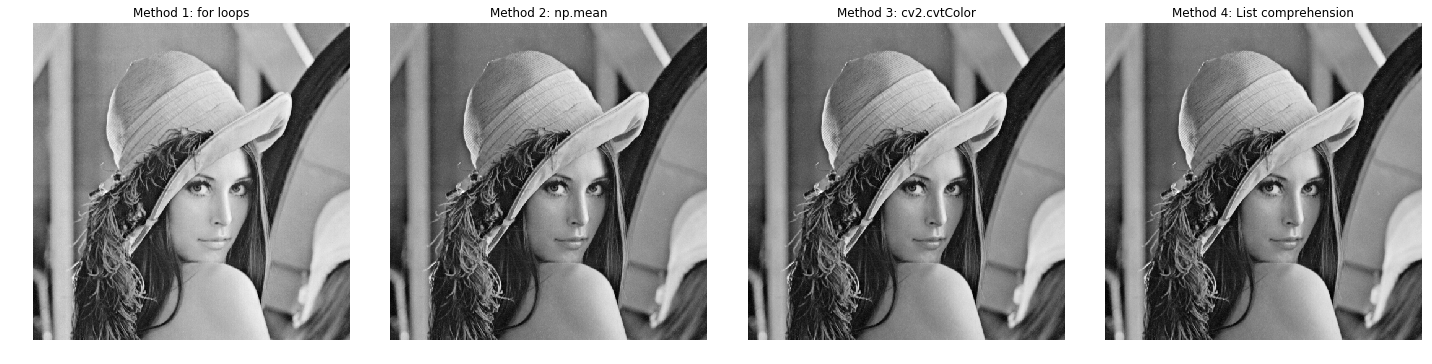

In [6]:
imgLena = image.imread('lenna.tif')
img_grayLena = rgb2gray(imgLena)

**Q2. Write python code  from scratch to convert Grayscale  image to Binary images using a 
def function and list of comprehension method and  plot processing time comparison with other methods**

In [7]:
def gray2bin(img1, threshold):
    
    row, col= img1.shape
    
    # method 1 
    # using for loops
    time1 = time.time()
    img_bin1 = np.zeros([row, col])
    for i in range(row):
        for j in range(col):
            if img1[i][j] > threshold:
                img_bin1[i][j] = 1
    time1 = time.time() - time1
    print(img_bin1.shape)
    
    # method 2 
    # In built opencv function to get the grayscale image
    time3 = time.time()
    ret, img_bin2 = cv2.threshold(img1, threshold, 255, cv2.THRESH_BINARY)
    time3 = time.time() - time3
    
    
    # method 3 list comprehension
    time4 = time.time()
    img_copy = np.reshape(img1, [row*col])
    bin1 = lambda x, threshold: 1 if x > threshold else 0  
    
    img_bin3 = np.zeros([row, col])
    img_bin3 = np.asarray([bin1(i, threshold) for i in img_copy])
    img_bin3 = np.reshape(img_bin3, [row, col])
    time4 = time.time() - time4
    
    print('time taken by each method :', time1,'sec. ,', time3, 'sec. , ' ,time4, 'sec. ')
    
    plot_time([time1, time3, time4])
    
    # visualizing the two images side by side
    fig2, ax2 = plt.subplots(1, 3, figsize = (12, 8))
    ax2[0].imshow(img_bin1, cmap = plt.get_cmap('gray'))
    ax2[0].set_title('Method 1: for loops')
    ax2[1].imshow(img_bin2,  cmap = plt.get_cmap('gray'))
    ax2[1].set_title('Method 2: cv2.threshold')
    ax2[2].imshow(img_bin3, cmap = plt.get_cmap('gray'))
    ax2[2].set_title('Method 3: List comprehension')
    ax2[0].axis('on')
    ax2[1].axis('on')
    ax2[2].axis('on')

    plt.tight_layout()

(360, 480)
time taken by each method : 0.517216682434082 sec. , 0.00812983512878418 sec. ,  0.2800107002258301 sec. 


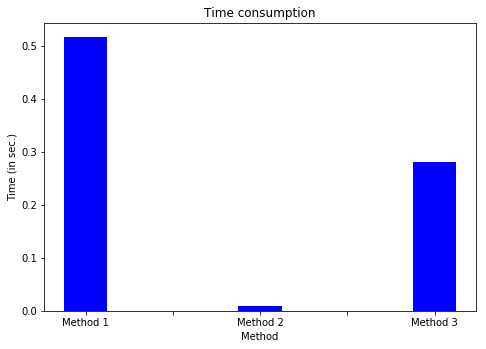

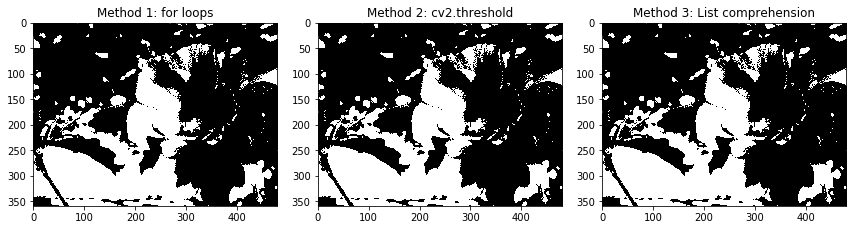

In [9]:
gray2bin(img_grayRose, 127)

(512, 512)
time taken by each method : 1.5829823017120361 sec. , 0.0 sec. ,  1.0421602725982666 sec. 


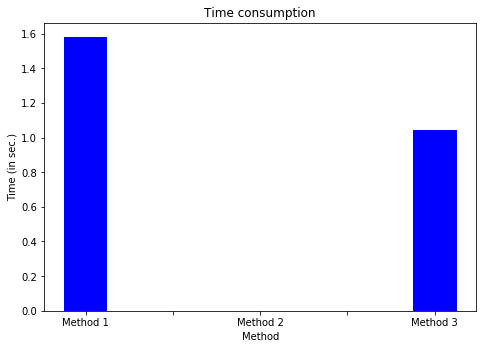

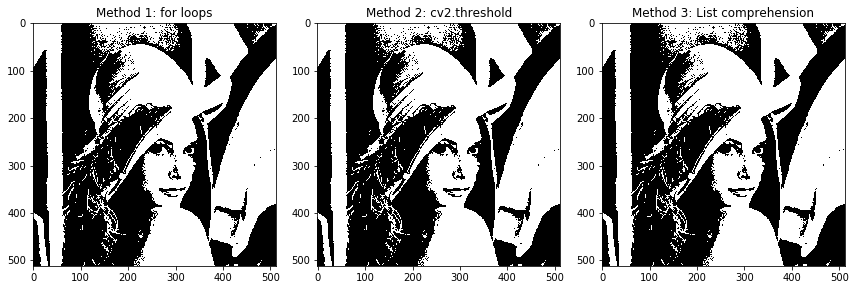

In [10]:
gray2bin(img_grayLena, 127)

**Q3.  Write python code  from scratch to  add and subtract two images  using def function and list of comprehension method and plot processing time comparison with other methods.**

In [11]:
def add_img(img1,img2, x, y):
    
    if (img1.shape == img2.shape):
    
        # method 1: list comprehension
        time1 = time.time()
        row, col, ch = img1.shape
        img1copy = img1.copy()
        img2copy = img2.copy()
        res = [ x*img1copy[i] + y*img2copy[i] for i in range(row)]
        res = np.asarray(res, dtype=np.uint8)
        time1 = time.time() - time1

        plt.imshow(res, cmap = plt.get_cmap('gray'))
        plt.title('Method 1: List Comprehension')
        plt.show()
        return time1, res 
    pass

def ad2img(img1, img2):
    
    if(img1.shape == img2.shape):
        
        # direct add 2 matrix
        time2 = time.time()
        res2 = img1 + img2
        time2 = time.time() - time2
        plt.imshow(res2, cmap = plt.get_cmap('gray'))
        plt.title('Method 2: image1 + image2')
        plt.show()
        return time2, res2
    pass

def sb2img(img1, img2):
    
    if(img1.shape == img2.shape):
        
        # direct add 2 matrix
        time2 = time.time()
        res2 = img1 - img2
        time2 = time.time() - time2
        plt.imshow(res2, cmap = plt.get_cmap('gray'))
        plt.title('Method 2: image1 - image2')
        plt.show()
        return time2, res2
    pass


In [12]:
star = cv2.imread('input2.jpg')
circle = cv2.imread('input1.jpg')

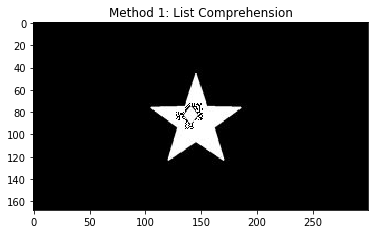

Time required:  0.04799938201904297 sec.


In [13]:
time1, res1 = add_img(circle, star, 1, 1)
print('Time required: ', time1, 'sec.')

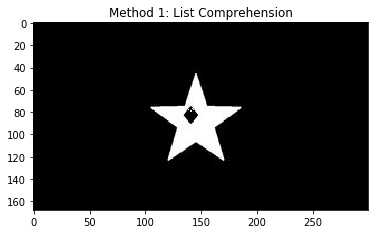

Time required:  0.0419924259185791 sec.


In [14]:
time2, res2 = add_img(circle, star, 1, -1)
print('Time required: ', time2, 'sec.')

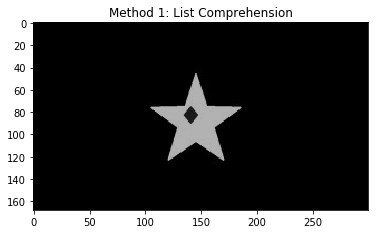

Time required:  0.058084726333618164 sec.


In [15]:
time3, res3 = add_img(circle, star, 0.7, -0.6)
print('Time required: ', time3, 'sec.')

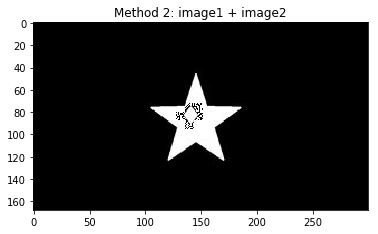

Time required:  0.0 sec.


In [16]:
time4, res4 = ad2img(star, circle)
print('Time required: ', time4, 'sec.')

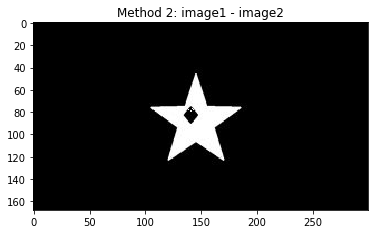

Time required:  0.0 sec.


In [17]:
time5, res5 = sb2img(circle, star)
print('Time required: ', time5, 'sec.')

Time required:  0.0 sec.


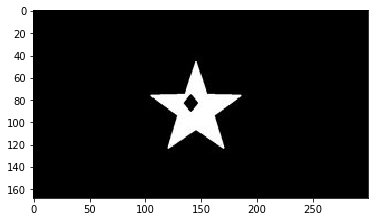

In [18]:
time6 = time.time()
dst = cv2.addWeighted(star,-1,circle,1,0)
time6 = time.time() - time6
plt.imshow(dst)
print('Time required: ', time6, 'sec.')

Text(0.5,0,'Method')

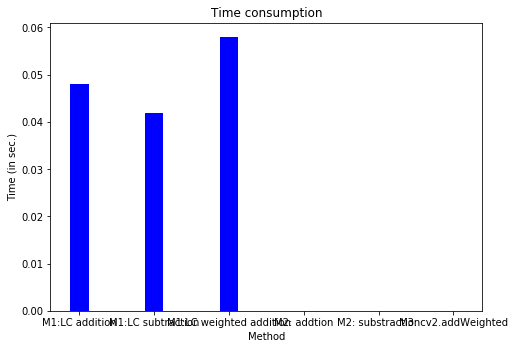

In [20]:
method_time = [time1, time2, time3, time4, time5, time6]
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.00, method_time, color = 'b', width = 0.25)

ax.set_ylabel('Time (in sec.)')
ax.set_title('Time consumption')
ax.set_xticklabels([' ', 'M1:LC addition','M1:LC subtraction', 'M1:LC weighted addition',
                    'M2: addtion', 'M2: substraction', 'M3: cv2.addWeighted'])
ax.set_xlabel('Method')